In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import scikitplot as skplt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
Data = pd.read_csv("/content/IEE520_Train.csv")

Dealing with missing values

In [ ]:
Data['x1'].value_counts()

0       7033
1        822
4        603
None     578
5        369
2        320
3        267
6          5
7          3
Name: x1, dtype: int64

In [ ]:
Data['x1']=Data['x1'].replace("None",'8')

In [ ]:
Data['x4'].value_counts()

1       1268
4       1234
5       1226
8       1120
3       1108
2       1022
7        613
None     581
10       479
6        455
9        338
0        324
12       185
11        47
Name: x4, dtype: int64

In [ ]:
Data['x4']=Data['x4'].replace("None",'13')

In [ ]:
Data['x8'].value_counts()

0       8919
20       197
None     174
15        80
5         46
3         46
4         43
7         32
12        32
36        29
8         27
2         25
31        25
10        24
11        24
16        23
29        20
24        20
28        20
21        18
19        16
18        15
17        14
13        13
27        12
22        11
9          9
32         9
26         9
35         8
38         8
23         6
14         6
37         6
1          5
6          5
39         5
33         5
34         5
25         5
30         3
40         1
Name: x8, dtype: int64

In [ ]:
Data['x8']=Data['x8'].replace("None",'41')

In [ ]:
X = Data.iloc[ :, : -1].values
Y = Data.iloc[ :, -1].values

Handling class imbalance

In [ ]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([7580, 2420]))

In [ ]:
X_new, y_new = SMOTE().fit_sample(X,Y)
y_new = pd.DataFrame(y_new)
X_new = pd.DataFrame(X_new)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(y_new,return_counts=True)

(array([0, 1]), array([7580, 7580]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 1)

Randomized search CV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Default Gradient Boosting:\n')
print(f' Parameters:\n {model}')
print(f' Default Score: {model.score(X_test,y_test)}\n')

# print('Hyper-Tuning Gradient Boosting:\n')

# GB_params = {"max_depth": [15, 20, 35], "min_samples_split": [2, 5, 10], "min_samples_leaf": [3,5, 7 ]}



# GB_grid = RandomizedSearchCV(estimator = GB, param_distributions = GB_params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# GB_grid.fit(X_train, y_train)
# GB = GB_grid.best_estimator_
# print(f' Tuned Parameters:\n {GB_grid.best_estimator_}')
# print(f' Tuned Params: {GB_grid.best_params_}\n')
# grad_boost = GB.fit(X_train, y_train)
# GB_preds = GB.predict(X_test)

# GB_score = GB.score(X_test, y_test)
# print(f' Hyper-Tuned Score: {GB_score}\n')


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Default Gradient Boosting:

 Parameters:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
 Default Score: 0.8977572559366754



In [ ]:
print('Hyper-Tuning Gradient Boosting:\n')

param_grid = {"max_depth": [15, 20, 35], "min_samples_split": [2, 5, 10], "min_samples_leaf": [3,5, 7], "learning_rate" : [1, 0.5, 0.25, 0.1, 0.05, 0.01], "n_estimators":[100,200]}



search_1 = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
search_1.fit(X_train, y_train)
search_1.best_estimator_

Hyper-Tuning Gradient Boosting:

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 47.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=15,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
search_1.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=15,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = search_1.predict(X_test)

Confusion Matrix on test data: 


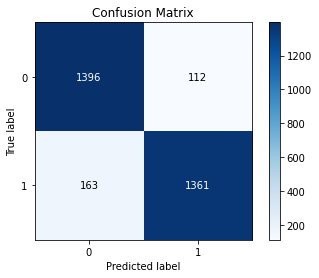

In [ ]:
print('Confusion Matrix on test data: ')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [ ]:
print('Accuracy on test data:')
print(accuracy_score(y_test, y_pred) )

Accuracy on test data:
0.9093007915567283


In [ ]:
Balanced_error_rate = ((112/(112+1396))+(163/(163+1361)))/2
print(Balanced_error_rate)

0.09061296880330277
